In [36]:
import numpy as np
import pandas as pd 
import sklearn 
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.svm import SVC 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [37]:
traindata = pd.read_excel('F:/Amino acid-classifier/classifier/data/training_set_20aa.xlsx')

X = traindata[['mean', 'std', 'skew', 'kurt', 'toff']]
y = traindata['label']
X = StandardScaler().fit_transform(X)
y = LabelEncoder().fit_transform(y)



In [38]:
testdata = pd.read_excel('F:/Amino acid-classifier/classifier/data/testing_set_20aa.xlsx')
test_X = testdata.iloc[:, 0:5]
test_X = StandardScaler().fit_transform(test_X)
target = LabelEncoder().fit_transform(testdata['label'])

In [39]:
encoder = OneHotEncoder(categories='auto')  
L = encoder.fit_transform(y.reshape(-1, 1)).toarray()

In [40]:
model = SVC(kernel='poly', degree=2, decision_function_shape='ovo', C=1, probability=True)


In [41]:
X

array([[-0.12297384, -0.10269074, -0.00763145, -0.14010338, -0.18014677],
       [ 0.00395346, -0.11819465, -0.05766221, -0.12617975, -0.14380765],
       [ 0.05815098,  0.04386506, -3.5590502 ,  2.7007848 ,  0.24714948],
       ...,
       [ 0.79338795,  0.57842168, -1.32621575, -0.03991203,  0.4470678 ],
       [ 0.73360022,  0.72872682, -0.97059137, -0.08664912,  0.29308094],
       [ 0.76014261,  0.6788332 , -1.10275988, -0.07316943,  0.22341226]])

In [42]:
scc = ['accuracy', 'precision', 'recall', 'f1','roc_auc']

In [43]:
model = SVC(kernel='linear', degree=2, decision_function_shape='ovr', C=1, probability=True)
result = cross_validate(model, X, y, scoring=scc, cv=10)



C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\DELL\miniconda3\envs\torch1.8\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y

In [44]:
result['test_accuracy'].mean()

0.963125

In [45]:
model.fit(X, y)

SVC(C=1, degree=2, kernel='linear', probability=True)

In [46]:
y_test = model.predict(test_X)
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, matthews_corrcoef
probs = model.predict_proba(test_X)
roc_auc = roc_auc_score(target, probs, multi_class="ovr")

In [47]:
roc_auc

0.9983406432748538

In [48]:
precision = precision_score(target, y_test, average='macro') 
recall = recall_score(target, y_test, average='macro')
f1 = f1_score(target, y_test, average='macro')
mcc = matthews_corrcoef(target, y_test)

print('f1_score is:', f1)
print('recall score is:', recall)
print('precision is:', precision)
print('mcc is:', mcc)

f1_score is: 0.9639724436124452
recall score is: 0.9641666666666666
precision is: 0.9654527327695425
mcc is: 0.9623770849877378


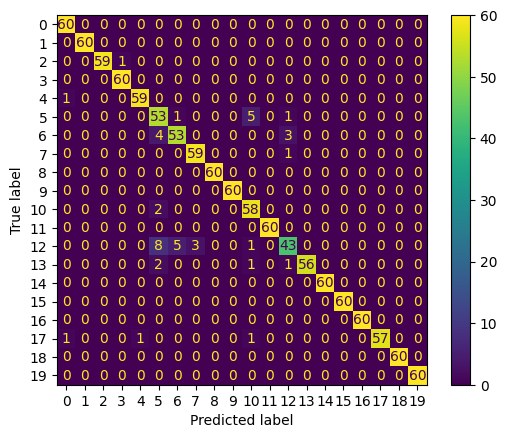

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(target, y_test)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
disp.plot()